# **Ecommerce Customer Churn Analysis and Prediction**

### **Business Problem Understanding**

**Context** 

Perusahaan e-commerce berusaha untuk mempertahankan pelanggan di tengah persaingan yang ketat. Saat ini, perusahaan mengalami tingkat churn yang cukup tinggi, yang berdampak langsung pada pendapatan dan menghambat pertumbuhan bisnis. Perusahaan ingin mengetahui faktor-faktor yang memengaruhi keputusan pelanggan untuk berhenti menggunakan layanan mereka dan berupaya memprediksi potensi churn di antara pelanggannya agar dapat mengambil langkah preventif yang efektif.

Target

- 0 : Tidak churn (pelanggan tetap menggunakan layanan)
- 1 : Churn (pelanggan berhenti menggunakan layanan)

**Problem Statement:**

Churn pelanggan yang tinggi menimbulkan kerugian bagi perusahaan dalam hal pendapatan dan biaya akuisisi pelanggan baru. Jika perusahaan menargetkan semua pelanggan untuk program retensi tanpa seleksi, hal ini akan menghabiskan waktu, biaya, dan sumber daya. Untuk meningkatkan efisiensi strategi retensi, perusahaan perlu memahami dan memprediksi pelanggan mana yang memiliki kemungkinan besar untuk churn sehingga perusahaan bisa fokus pada pelanggan yang benar-benar berisiko tinggi untuk churn.

**Goals:**

Berdasarkan permasalahan tersebut, tujuan perusahaan meliputi:
1. Memperkirakan kemungkinan churn: Perusahaan ingin memprediksi pelanggan yang memiliki kemungkinan untuk churn agar dapat memusatkan program retensi pada mereka yang berisiko tinggi.
2. Mengidentifikasi faktor-faktor penyebab churn: Perusahaan ingin mengetahui variabel atau pola apa yang memengaruhi keputusan pelanggan untuk churn sehingga bisa menyusun strategi yang lebih efektif untuk mempertahankan pelanggan.

**Analytic Approach:**

Untuk mencapai tujuan ini, pendekatan analitik yang akan dilakukan adalah:
1. Analisis Data: Menganalisis perilaku pelanggan, seperti frekuensi pembelian, keterlibatan dalam promosi, dan faktor lainnya untuk menemukan pola atau ciri-ciri pelanggan yang rentan churn.
2. Model Prediktif: Mengembangkan model klasifikasi yang dapat memperkirakan probabilitas churn di masa depan dengan menggunakan data historis pelanggan. Model ini akan membantu perusahaan mengenali pelanggan yang paling mungkin churn.

**Metric Evaluation** 

Type 1 Error (*False Positive*):
Model memprediksi pelanggan akan churn, padahal sebenarnya tidak.
- Konsekuensi: Terjadinya pemborosan sumber daya perusahaan untuk menargetkan pelanggan yang tidak perlu diikuti dalam program retensi.

Type 2 Error (*False Negative*): 
Model tidak memprediksi churn, padahal pelanggan tersebut churn.
- Konsekuensi: Kehilangan pelanggan yang sebenarnya dapat dicegah dengan strategi retensi yang tepat.

True Positive (TP):
Model memprediksi churn, dan pelanggan benar-benar churn.
- Manfaat: Perusahaan dapat mengambil tindakan tepat waktu untuk mencegah churn, seperti memberikan promosi atau insentif, sehingga dapat mempertahankan pelanggan yang benar-benar berisiko tinggi untuk churn.

True Negative (TN):
Model memprediksi pelanggan tidak akan churn, dan pelanggan benar-benar tidak churn.
- Manfaat: Perusahaan dapat menghindari upaya retensi yang tidak perlu, menghemat waktu dan sumber daya, dan tetap fokus pada pelanggan yang benar-benar memerlukan perhatian lebih untuk mengurangi churn.

Dengan mempertimbangkan True Positive dan True Negative dalam evaluasi, perusahaan dapat memastikan bahwa model memiliki keseimbangan yang baik antara mengidentifikasi pelanggan yang rentan churn dan menghindari pemborosan sumber daya untuk pelanggan yang tidak membutuhkan tindakan retensi. Metrik utama yang digunakan adalah F1-Score atau Precision-Recall Curves karena keduanya efektif dalam menangani kasus data yang tidak seimbang.



### **Data Understanding**

Data Source : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


**Data Dictionary**

Dataset yang digunakan adalah data ecommerce customer churn sebanyak 5630 baris data dan sebanyak 20 kolom atau fitur. Kolom ini mewakili informasi dari pelanggan yang terdaftar. Kolom-kolom yang terdapat dalam dataset antara lain: 

| Variable |Data Type| 	Description| 
|----------|-------|---------
| CustomerID |Integer	|Unique customer ID
|Churn |Integer	|Churn Flag
|Tenure|Float	|Tenure of customer in organization
|PreferredLoginDevice|Object	|Preferred login device of customer
|CityTier|Integer	|City tier
|WarehouseToHome|Float	|Distance in between warehouse to home of customer
|PreferredPaymentMode|	Object|Preferred payment method of customer
|Gender|Object	|Gender of customer
|HourSpendOnApp|Float	|Number of hours spend on mobile application or website
|NumberOfDeviceRegistered|Integer|Total number of deceives is registered on particular customer
|PreferedOrderCat|Object	|Preferred order category of customer in last month
|SatisfactionScore|Integer	|Satisfactory score of customer on service
|MaritalStatus|Object	|Marital status of customer
|NumberOfAddress|Integer	|Total number of added added on particular customer
|Complain|	Integer|Any complaint has been raised in last month
|OrderAmountHikeFromlastYear|Float	|Percentage increases in order from last year
|CouponUsed|Float	|Total number of coupon has been used in last month
|OrderCount	| Float|Total number of orders has been places in last month
|DaySinceLastOrder|Float	|Day Since last order by customer
|CashbackAmount|Float	|Average cashback in last month





In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
df.shape

(5630, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


### **Data Cleaning**

In [7]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,CustomerID,int64,5630,"[52319, 53674]"
1,Churn,int64,2,"[1, 0]"
2,Tenure,float64,36,"[6.0, 16.0]"
3,PreferredLoginDevice,object,3,"[Phone, Computer]"
4,CityTier,int64,3,"[2, 3]"
5,WarehouseToHome,float64,34,"[23.0, 24.0]"
6,PreferredPaymentMode,object,7,"[Cash on Delivery, Debit Card]"
7,Gender,object,2,"[Female, Male]"
8,HourSpendOnApp,float64,6,"[nan, 2.0]"
9,NumberOfDeviceRegistered,int64,6,"[1, 4]"


Pada beberapa kolom, ditemukan beberapa nilai yang tidak konsisten. Misalnya pada kolom PrefferedLoginDevice terdapat nilai 'Mobile Phone' dan 'Phone' yang merujuk ke perangkat yang sama. Oleh karenanya, dilakukan replace value untuk menangani hal ini. Selain kolom PrefferedLoginDevice, pada kolom PreferredPaymentMode dan PreferedOrderCat juga ditemukan hal yang sama.

In [8]:
df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)
df['PreferedOrderCat'].replace('Mobile', 'Mobile phone', inplace=True)

***Missing Values***

In [9]:
df.isna().sum()/df.shape[0]*100

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

Terdapat 7 kolom yang memiliki missing value, Tenure, WerehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [10]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Ringkasan dari pengecekan nilai null pada dataset dapat dilihat melalui tabel berikut:

In [11]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage
0,CustomerID,int64,0,0.00
1,Churn,int64,0,0.00
2,Tenure,float64,264,4.69
3,PreferredLoginDevice,object,0,0.00
4,CityTier,int64,0,0.00
5,WarehouseToHome,float64,251,4.46
6,PreferredPaymentMode,object,0,0.00
7,Gender,object,0,0.00
8,HourSpendOnApp,float64,255,4.53
9,NumberOfDeviceRegistered,int64,0,0.00


Missing value pada dateset ini dapat diklasifikasikan menjadi 3, yaitu: 

1. Missing Completely at Random (MCAR)
Data MCAR adalah data yang nilai hilangnya tidak memiliki pola tertentu. Fitur WarehouseToHome dan HourSpendOnApp mungkin termasuk dalam kategori MCAR, karena waktu yang dihabiskan di aplikasi atau jarak ke gudang mungkin tidak bergantung pada fitur lainnya.
- Pendekatan Penanganan: Karena data MCAR tidak bergantung pada fitur lain, nilai yang hilang dapat diisi dengan nilai rata-rata atau median tanpa menimbulkan bias yang berarti.

2. Missing at Random (MAR)
Nilai hilang pada MAR berkaitan dengan data lain yang teramati. Fitur seperti Tenure dan OrderAmountHikeFromlastYear bisa termasuk MAR, karena pelanggan dengan masa penggunaan yang lebih singkat mungkin memiliki lebih banyak data yang hilang, dan kebiasaan belanja (sehingga kenaikan jumlah order) dapat berkorelasi dengan masa penggunaan atau waktu penggunaan aplikasi.
- Pendekatan Penanganan: Untuk data MAR, metode seperti imputasi berdasarkan fitur yang terkait (misalnya, menggunakan pengelompokan berdasarkan masa penggunaan untuk mengisi nilai hilang) atau model prediktif dapat digunakan untuk mengisi nilai hilang berdasarkan pola dalam data yang teramati.

3. Missing Not at Random (MNAR)
MNAR terjadi ketika nilai hilang terkait dengan nilai dari fitur itu sendiri. Fitur CouponUsed, OrderCount, dan DaySinceLastOrder mungkin termasuk MNAR jika, misalnya, pelanggan yang jarang menggunakan kupon atau jarang memesan memiliki nilai hilang pada fitur-fitur ini, atau ada periode tanpa pesanan baru.
- Pendekatan Penanganan: Untuk MNAR, strategi yang efektif meliputi membuat variabel indikator untuk menandai tempat data hilang, karena hilangnya nilai ini bisa saja memiliki informasi penting. Alternatifnya, bisa dipertimbangkan imputasi berdasarkan pengetahuan spesifik domain atau memodelkan missingness langsung jika memungkinkan.

Langkah Selanjutnya
Untuk menangani missing value ini:
- MCAR: Gunakan imputasi median.
- MAR:  KNN Imputer.
- MNAR: Buat variabel indikator dan gunakan pengetahuan spesifik domain atau pertimbangkan strategi imputasi lanjutan seperti iterative imputer.

In [12]:
knn_imputer = KNNImputer(n_neighbors=5)

median_imputer = SimpleImputer(strategy='median')

df[['Tenure', 'OrderAmountHikeFromlastYear']] = knn_imputer.fit_transform(df[['Tenure', 'OrderAmountHikeFromlastYear']])

df[['WarehouseToHome', 'HourSpendOnApp']] = median_imputer.fit_transform(df[['WarehouseToHome', 'HourSpendOnApp']])

Penanganan untuk MNAR 

1. CouponUsed  
   - Nilai yang hilang pada CouponUsed dapat terjadi jika pelanggan jarang atau bahkan tidak pernah menggunakan kupon. Pendekatan yang dapat dilakukan adalah mengisi nilai hilang dengan nilai 0 (untuk menandakan bahwa kupon tidak digunakan), atau membuat variabel indikator yang mencatat nilai hilang sebagai kategori khusus, misalnya “Tidak Digunakan”.
   - Penggunaan kupon umumnya bersifat sporadis atau preferensi tertentu, sehingga asumsi ini logis.

2. OrderCount  
   - Pada OrderCount, nilai hilang dapat diasumsikan sebagai tidak adanya pesanan pada periode tertentu. Pendekatan ini dapat diatasi dengan mengisi nilai hilang dengan angka 0 atau membuat indikator khusus untuk menunjukkan adanya periode non-pesanan.
   - Banyak e-commerce mencatat periode tanpa aktivitas pesanan, sehingga nilai 0 atau variabel indikator dapat memberikan wawasan lebih lanjut.


In [13]:
df['CouponUsed'] = df['CouponUsed'].fillna(0)
df['OrderCount'] = df['OrderCount'].fillna(0)

3. DaySinceLastOrder  
   - Jika missing values di kolom DaySinceLastOrder menggambarkan ketidakaktifan atau ketiadaan pesanan, mengisi nilai hilang dengan perkiraan tertentu bisa menyesatkan. Menambahkan variabel indikator (flag) untuk menunjukkan pelanggan yang memiliki nilai missing di kolom ini dapat memberikan insight tambahan. Ini sangat berguna karena memungkinkan analisis terpisah antara pelanggan yang aktif dan tidak aktif.
   - Tambahkan kolom baru, misalnya NoLastOrderInfo, yang berisi nilai 1 jika DaySinceLastOrder hilang dan 0 jika tidak. Setelah menandai, nilai hilang di DaySinceLastOrder bisa diisi dengan nilai median atau mean.
   - Jika pelanggan tertentu tidak pernah memesan, isi nilai hilangnya dengan median dan berikan indikator 1 pada kolom NoLastOrderInfo. Dengan demikian, kita dapat menyegmentasi pelanggan berdasarkan aktivitas mereka.
   - Dengan pendekatan ini, kita menggunakan konteks operasional dari e-commerce untuk memastikan bahwa pengisian nilai hilang tetap memberikan informasi yang relevan dan tidak mengaburkan pola dalam data.

In [14]:
df['NoLastOrderInfo'] = df['DaySinceLastOrder'].isna().astype(int)

In [19]:
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [20]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
NoLastOrderInfo                0
dtype: int64

***Duplicated Values***

Setelahnya, dapat dilakukan pengecekkan apakah terdapat data yang terduplikasi. 

In [21]:
df[df.duplicated()].shape[0]

0

Dapat dilihat bahwa tidak terdapat data duplikat yang teridentifikasi. 

***Outliers***

Selanjutnya dilakukan pengecekan outliers pada kolom-kolom yang bersifat numerik. Kolom Churn, CityTier, dan Complain tidak dimasukan karena kolom tersebut mewakili kategori atau flagging.  

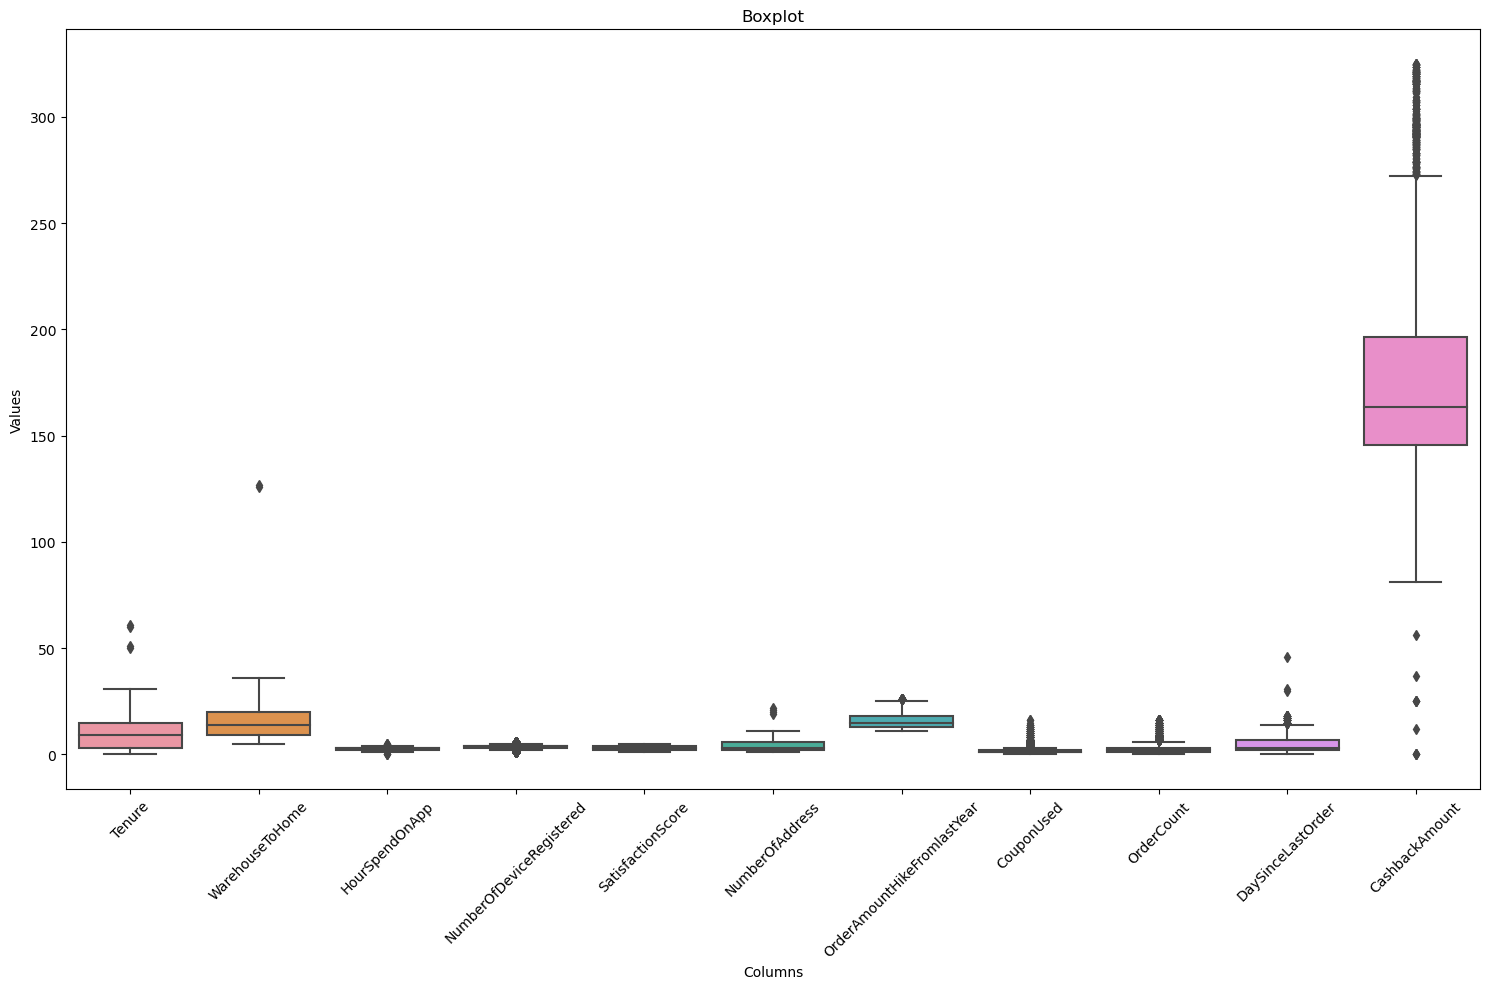

In [ ]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

plt.figure(figsize=(15, 10))  
sns.boxplot(data=df[num_columns])
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

Dapat dilihat bahwa hampir seluruhnya memiliki outliers. Selanjutnya, dapat dicari berapa banyak outliers dari masing-masing kolom. 

In [36]:
num_columns = [
    'Tenure','WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def count_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers.shape[0]

outliers_counts = {col: count_outliers(df, col) for col in columns_to_check}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 4 outliers
WarehouseToHome: 2 outliers
HourSpendOnApp: 6 outliers
NumberOfDeviceRegistered: 397 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 4 outliers
OrderAmountHikeFromlastYear: 33 outliers
CouponUsed: 629 outliers
OrderCount: 703 outliers
DaySinceLastOrder: 62 outliers
CashbackAmount: 438 outliers


Berdasarkan hasil pengecekan, data yang termasuk ke dalam outliers dapat dikatakan cukup banyak sehingga penghapusan mungkin akan mempengaruhi hasil analisis. Pendekatan penanganan outliers yang dilakukan adalah mengganti nilai outliers dengan nilai ambang batas yang dihitung berdasarkan upper range dan lower range dari masing-masing kolom. Hal ini dilakukan mengurangi pengaruh nilai ekstrim tersebut terhadap model atau analisis tanpa menghapus data. 

In [37]:
num_columns = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
    'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'
]

def replace_outliers_with_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return data

for col in num_columns:
    df = replace_outliers_with_bounds(df, col)


In [42]:
outliers_counts = {col: count_outliers(df, col) for col in num_columns}

for col, count in outliers_counts.items():
    print(f"{col}: {count} outliers")

Tenure: 0 outliers
WarehouseToHome: 0 outliers
HourSpendOnApp: 0 outliers
NumberOfDeviceRegistered: 0 outliers
SatisfactionScore: 0 outliers
NumberOfAddress: 0 outliers
OrderAmountHikeFromlastYear: 0 outliers
CouponUsed: 0 outliers
OrderCount: 0 outliers
DaySinceLastOrder: 0 outliers
CashbackAmount: 0 outliers


***Remove Unused Data***

Beriktunya, dapat dilakukan penghapusan kolom yang tidak digunakan untuk analisis, yaitu kolom Customer ID. Kolom CustomerID dapat dihapus karena berisi ID unik pelanggan, dimana ID ini tidak memberikan informasi langsung tentang perilaku atau faktor churn.

In [43]:
df.drop(columns=['CustomerID'], inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

### **Data Analysis**

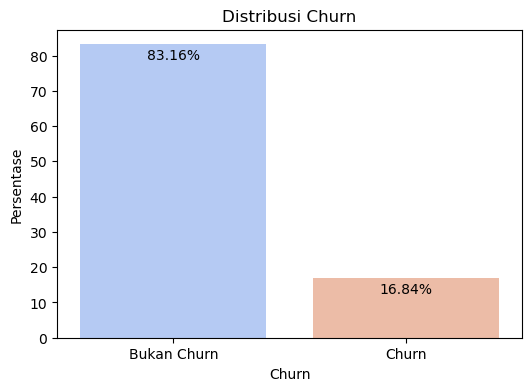

In [70]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')

for i, value in enumerate(churn_counts.values):
     plt.text(i, value - 5  , f'{value:.2f}%', ha='center', va='bottom')

plt.title('Distribusi Churn')
plt.xlabel('Churn')
plt.ylabel('Persentase')
plt.xticks([0, 1], ['Bukan Churn', 'Churn'])
plt.show()

Berdasarkan grafik tersebut, dapat dilihat bahwa persentase Bukan Churn dan Churn adalah 83.16% dan 16.84%, dapat dikatakan perbandingan Bukan Churn dengan Churn adalah sebesar 5 : 1. Selanjutnya, dapat dilakukan pengecekan korelasi antar kolom dengan menggunakan heatmap. 

C:\Users\Budi Ismail\AppData\Local\Temp\ipykernel_35464\2178362913.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


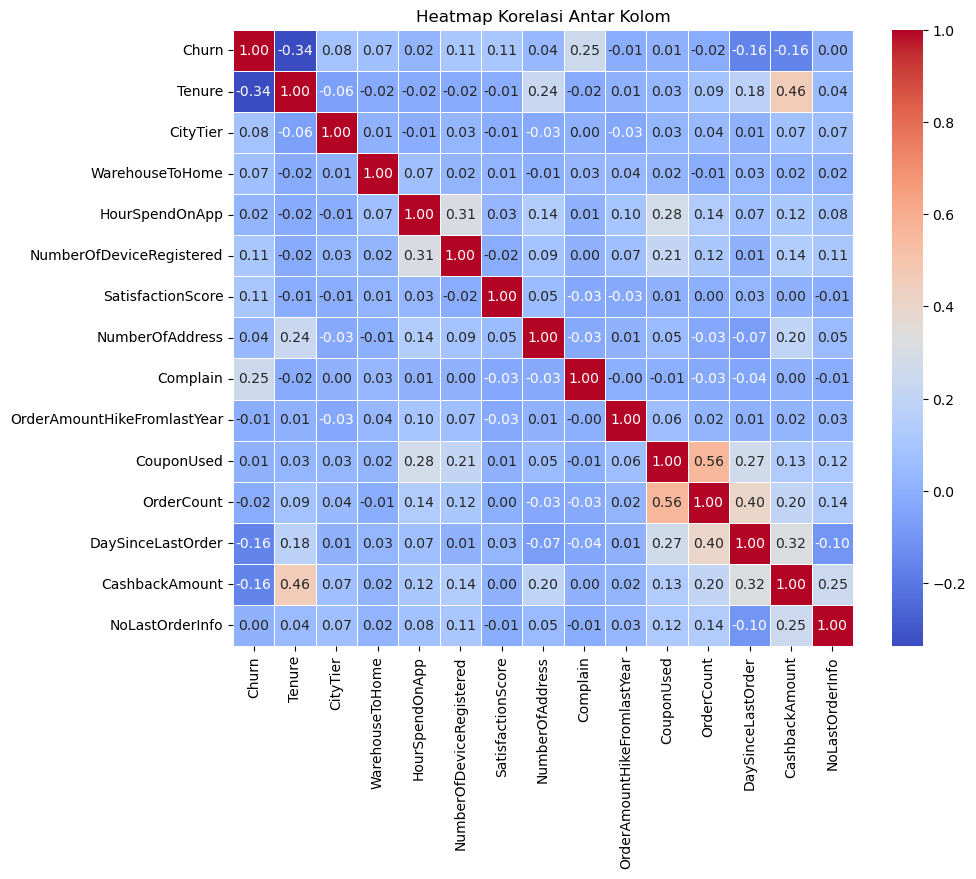

In [96]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

Berdasarkan heatmap tersebut, terlihat kolom mana saja yang memiliki korelasi relatif kuat dengan kolom Churn, seperti Tenure, Complain, DaySinceLastOrder, dan CashBackAmount. Selain itu, terdapat beberapa kolom atau fitur yang relevan secara logis dengan Churn Flag (fitur tujuan), yaitu: 

1. E Comm Tenure (Masa Keanggotaan Pelanggan)
   - Masa keanggotaan mencerminkan durasi pelanggan berinteraksi dengan platform.
   - Pelanggan dengan masa keanggotaan lebih pendek mungkin belum memiliki keterikatan kuat dengan platform, sehingga lebih rentan untuk berhenti. Sebaliknya, pelanggan dengan masa keanggotaan panjang cenderung lebih loyal.

2. E Comm SatisfactionScore (Skor Kepuasan Pelanggan)
   - Kepuasan pelanggan adalah indikator langsung dari pengalaman mereka dengan layanan.
   - Skor kepuasan rendah menunjukkan ketidakpuasan, yang dapat mendorong pelanggan untuk mencari alternatif lain, meningkatkan kemungkinan churn.

3. E Comm Complain (Keluhan Pelanggan)
   - Keluhan mencerminkan masalah yang dialami pelanggan.
   - Pelanggan yang mengajukan keluhan, terutama jika tidak ditangani dengan baik, lebih mungkin merasa tidak puas dan memutuskan untuk berhenti menggunakan layanan.

4. E Comm DaySinceLastOrder (Hari Sejak Pesanan Terakhir)
   - Frekuensi pembelian mencerminkan keterlibatan pelanggan.
   - Semakin lama interval sejak pesanan terakhir, semakin besar kemungkinan pelanggan telah kehilangan minat atau beralih ke platform lain, meningkatkan risiko churn.

5. E Comm OrderCount (Jumlah Pesanan dalam Sebulan Terakhir)
   - Aktivitas pembelian mencerminkan keterlibatan dan nilai pelanggan.
   - Jumlah pesanan yang rendah dalam periode terbaru dapat menunjukkan penurunan minat atau kebutuhan, yang dapat menjadi indikator awal dari churn.

6. E Comm HourSpendOnApp (Jam yang Dihabiskan di Aplikasi)
   - Waktu yang dihabiskan di aplikasi mencerminkan tingkat keterlibatan.
   - Penurunan signifikan dalam waktu yang dihabiskan di aplikasi dapat menunjukkan penurunan minat atau kepuasan, yang dapat menyebabkan churn.

7. E Comm PreferredPaymentMode (Metode Pembayaran Pilihan)
   - Preferensi pembayaran dapat memengaruhi kenyamanan dan kepuasan pelanggan.
   - Jika metode pembayaran pilihan tidak lagi didukung atau mengalami masalah, pelanggan mungkin merasa tidak puas dan mempertimbangkan untuk berhenti.

8. E Comm CashbackAmount (Jumlah Cashback Rata-rata dalam Sebulan Terakhir)
   - Insentif finansial seperti cashback dapat meningkatkan loyalitas pelanggan.
   - Penurunan atau penghentian cashback dapat membuat pelanggan merasa kurang dihargai, meningkatkan risiko churn.

**Churn dengan SatisfactionScore**

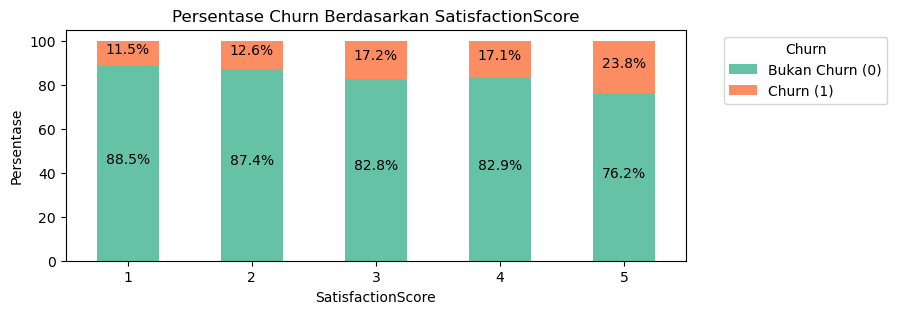

In [109]:
col = 'SatisfactionScore'
churn_percent = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_percent.div(churn_percent.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 3))

plt.title(f'Persentase Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)

plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%', ha='center', color='black')

plt.show()

Persentase churn yang lebih tinggi pada pelanggan dengan skor kepuasan tinggi menunjukkan bahwa ada faktor lain yang mempengaruhi keputusan pelanggan untuk berhenti, meskipun mereka merasa puas. Ini mungkin mengindikasikan adanya faktor ketidakpuasan  masalah lain yang perlu ditangani perusahaan untuk meningkatkan retensi dari pelanggan.

**Churn dengan Complain**

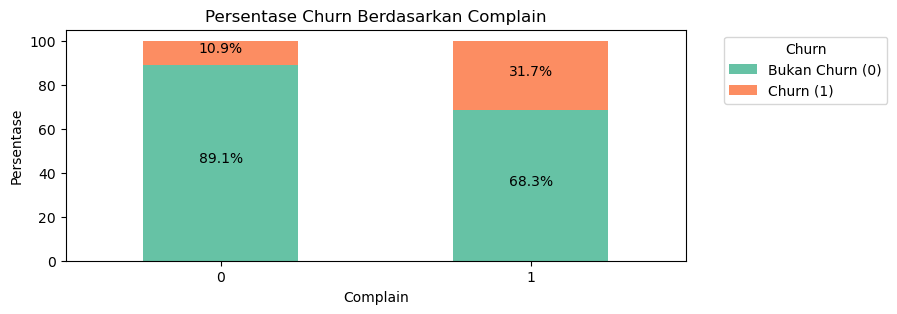

In [111]:
col = 'Complain'
churn_percent = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_percent.div(churn_percent.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 3))

plt.title(f'Persentase Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)

plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%', ha='center', color='black')

plt.show()

Berdasarkan grafik tersebut, terlihat bahwa pelanggan yang pernah melakukan komplain memiliki persentase churn yang lebih tinggi dibandingkan dengan pelanggan yang tidak pernah melakukan komplain. Hal ini dapat mengindikasikan bahwa ketidakpuasan atau pengalaman negatif pelanggan berpotensi meningkatkan kemungkinan mereka menjadi churn atau berhenti menggunakan layanan. 

**Churn dengan PreferredPaymentMode**

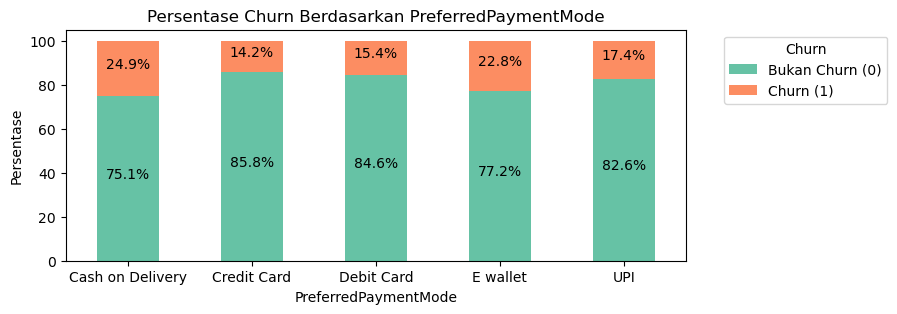

In [114]:
col = 'PreferredPaymentMode'
churn_percent = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
churn_percent = churn_percent.div(churn_percent.sum(axis=1), axis=0) * 100

ax = churn_percent.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'), figsize=(8, 3))

plt.title(f'Persentase Churn Berdasarkan {col}')
plt.xlabel(col)
plt.ylabel('Persentase')
plt.xticks(rotation=0)

plt.legend(['Bukan Churn (0)', 'Churn (1)'], title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, (label, row) in enumerate(churn_percent.iterrows()):
    plt.text(i, row[0] / 2, f'{row[0]:.1f}%', ha='center', color='black')
    plt.text(i, row[0] + row[1] / 2, f'{row[1]:.1f}%', ha='center', color='black')

plt.show()

Berdasarkan grafik, metode COD (Cash On Delivery) memiliki persentase tingkat churn tertinggi diikuti dengan penggunaan E-Wallet. Hal ini dapat mengindikasikan bahwa terdapat masalah pada transaksi atau kurangnya kepuasan pelanggan dalam menggunakan metode pembayaran tersebut. Sementara itu, metode pembayaran dengan menggunakan kartu kredit (Credit Card) memiliki persentase tingkat churn terendah. Hal ini dapat mengindikasikan bahwa pelanggan lebih puas dalam menggunakan proses pembayaran menggunakan kartu kredit. 